In [2]:
# %load ../jupyter_imports.py
%load_ext autoreload
%autoreload 2

from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.io import loadmat, savemat
from math import floor, ceil
# Script to add the entire project directory structure to the python path
import sys, os

# Find the root directory of the nse project
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir != 'analysis':
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
for d in ["linear", "prelim", "utils", "kerasmodels"]:
	if 'p\\%s' % d not in sys.path:
		sys.path.append('p\\%s' % d)

# Now import all the other stuff:
from utils import preprocess
from utils import process
from utils import misc 
from linear import linear_models

In [3]:
x = loadmat('%s/HighGammaAllChannels10sMovingZ.mat' % misc.get_data_path())
e105 = x['data'][:, 104]
stim = loadmat('%s/DynRip.cchspct.6oct.100hz' % misc.get_data_path())
stim, resp = preprocess.align(stim['spct'], e105)

C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\Ankit\Miniconda3\envs\nse\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


In [100]:
p = process.split_data(stim, resp, 2, train_split = 0.4)

In [75]:
htest = linear_models.nrc(process.flatten_spct(p.train_stim), p.train_resp, 0.9)

0/444

100/444

200/444

300/444

400/444



In [79]:
h2 = linear_models.nrc(process.compress_spct(p.train_stim), p.train_resp, 0.9)

C:\Users\Ankit\nse\analysis\utils\process.py:42: RuntimeWarning: invalid value encountered in log
  return binned_data, np.arange(binned_data.size)


AssertionError: 

In [81]:
a = np.arange(10)

In [68]:
y_pred = process.evaluate_strf(p.test_stim, p.test_resp, h)

In [69]:
y_pred

-1.1129189372051642

In [66]:
hreshaped = np.reshape(h, (100, 50))

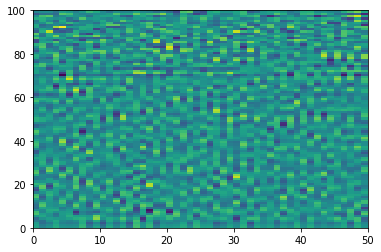

In [67]:
plt.pcolor(hreshaped)

In [47]:
np.max(h)

0.00776170358384952

In [48]:
np.min(h)

-0.007452075467478699

In [49]:
np.min(np.abs(h))

4.910768406059599e-07

In [52]:
savemat('%s/nrc_strf1.mat' % misc.get_data_path(), dict([('h', h), ('rscore', y_pred)]))n

In [115]:
# Run NRC on the log of the spectrogram
h2 = linear_models.nrc(process.compress_spct(p.train_stim), p.train_resp, 0.9)

0/17776

100/17776

200/17776

300/17776

400/17776

500/17776

600/17776

700/17776

800/17776

900/17776

1000/17776

1100/17776

1200/17776

1300/17776

1400/17776

1500/17776

1600/17776

1700/17776

1800/17776

1900/17776

2000/17776

2100/17776

2200/17776

2300/17776

2400/17776

2500/17776

2600/17776

2700/17776

2800/17776

2900/17776

3000/17776

3100/17776

3200/17776

3300/17776

3400/17776

3500/17776

3600/17776

3700/17776

3800/17776

3900/17776

4000/17776

4100/17776

4200/17776

4300/17776

4400/17776

4500/17776

4600/17776

4700/17776

4800/17776

4900/17776

5000/17776

5100/17776

5200/17776

5300/17776

5400/17776

5500/17776

5600/17776

5700/17776

5800/17776

5900/17776

6000/17776

6100/17776

6200/17776

6300/17776

6400/17776

6500/17776

6600/17776

6700/17776

6800/17776

6900/17776

7000/17776

7100/17776

7200/17776

7300/17776

7400/17776

7500/17776

7600/17776

7700/17776

7800/17776

7900/17776

8000/17776

8100/17776

8200/17776

8300/17776

8400

KeyboardInterrupt: 

In [94]:
x = process.compress_spct(p.train_stim)

C:\Users\Ankit\nse\analysis\utils\process.py:43: RuntimeWarning: invalid value encountered in log
  pdb.set_trace()


In [96]:
x.shape

(17776, 5000)

In [61]:
x[0]

array([-3.66412977, -4.03982235, -3.63408723, ..., -0.31822119,
       -0.44755827, -0.31034014])

In [102]:
p.train_stim

array([[[0.10152667, 0.09616082, 0.17417401, ..., 0.11779416,
         0.18453595, 0.17591503],
        [2.00307904, 1.57463414, 2.05633617, ..., 1.34203505,
         1.29557189, 1.09777   ],
        [3.18753301, 2.42506024, 1.97782126, ..., 2.04601904,
         1.57350488, 1.74628094],
        ...,
        [1.49612826, 1.76365727, 3.8677511 , ..., 2.00530453,
         4.30426854, 3.10200185],
        [0.83684863, 1.0436208 , 2.06621733, ..., 1.17715833,
         2.20849559, 1.57163012],
        [0.73807585, 0.95284791, 1.69253314, ..., 1.05791353,
         1.81264587, 1.25914285]],

       [[0.02869222, 0.01614441, 0.02502685, ..., 0.02264746,
         0.03607399, 0.03175837],
        [1.24930304, 0.75415619, 0.64910847, ..., 2.50423033,
         3.3628441 , 3.8327902 ],
        [5.01990219, 3.10283371, 1.91232538, ..., 3.88945152,
         4.07144812, 6.63529479],
        ...,
        [2.84018273, 4.60200211, 2.4856387 , ..., 0.7143552 ,
         0.53980738, 0.64139954],
        [1.5

In [62]:
np.log(0.02562646)

-3.664129867536857

In [82]:
v1 = a[4:5]

In [83]:
v1

array([4])

In [84]:
v1 = a[4:6]

In [85]:
v1[0] = 0

In [86]:
a

array([0, 1, 2, 3, 0, 5, 6, 7, 8, 9])

In [113]:
x = process.compress_spct(p.train_stim)

In [110]:
x[0]

array([-2.28743375, -2.34173333, -1.74770043, ...,  0.0562986 ,
        0.59478758,  0.23043121])

In [114]:
p.train_stim[0]

array([[0.10152667, 0.09616082, 0.17417401, ..., 0.11779416, 0.18453595,
        0.17591503],
       [2.00307904, 1.57463414, 2.05633617, ..., 1.34203505, 1.29557189,
        1.09777   ],
       [3.18753301, 2.42506024, 1.97782126, ..., 2.04601904, 1.57350488,
        1.74628094],
       ...,
       [1.49612826, 1.76365727, 3.8677511 , ..., 2.00530453, 4.30426854,
        3.10200185],
       [0.83684863, 1.0436208 , 2.06621733, ..., 1.17715833, 2.20849559,
        1.57163012],
       [0.73807585, 0.95284791, 1.69253314, ..., 1.05791353, 1.81264587,
        1.25914285]])

In [106]:
y[0] = 5

In [107]:
x

array([5, 5, 5, 5, 5, 5, 6, 7, 8, 9])

In [158]:
xtrain1 = process.flatten_spct(process.remove_channels(p.train_stim, 0))
xtest1 = process.flatten_spct(process.remove_channels(p.test_stim, 0))
xtrain2 = process.flatten_spct(process.remove_channels(p.train_stim, 1))
xtest2 = process.flatten_spct(process.remove_channels(p.test_stim, 1))
xtrain2 = process.flatten_spct(process.remove_channels(p.train_stim, 5))
xtest2 = process.flatten_spct(process.remove_channels(p.test_stim, 5))

In [149]:
r1 = linear_models.ridge_regression(xtrain1, p.train_resp, xtest1, p.test_resp)

---37.583348989486694 seconds---
-0.35297801513569915


In [155]:
r2 = linear_models.ridge_regression(xtrain1, p.train_resp, xtest1, p.test_resp)

---37.23710751533508 seconds---
-0.009911632085288113


In [160]:
r3 = linear_models.ridge_regression(xtrain1, p.train_resp, xtest1, p.test_resp)

---47.72504472732544 seconds---
-0.010391404014749916


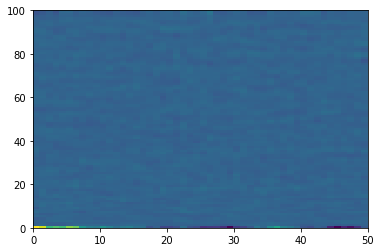

In [164]:
plt.pcolor(np.reshape(r3.coef_, (100, 50)))

In [124]:
r3 = linear_models.ridge_regression(process.compress_spct(process.remove_DC(p.train_stim)), p.train_resp, process.compress_spct(process.remove_DC(p.test_stim)), p.test_resp)

---44.43207550048828 seconds---
-0.007508992786191548


In [126]:
weights = np.reshape(r3.coef_, (99, 50))

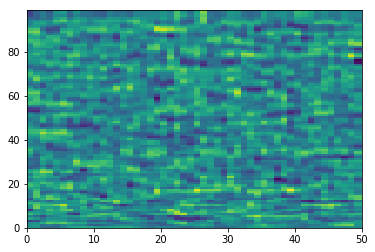

In [127]:
plt.pcolor(weights)

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 1)
